# Regressive Approach for Data Mining
Involves the use of a Decision Tree Classifier to predict amount of steps needed for a shuttlecock trajectory and a Random Forest Tree Regressive Model to determine the coordinates of each data point of the trajectory with respects to the court's X (length), Y (breadth), Z(height) coordinates. 

## Loading Dependencies

In [1]:
%pip install pandas
%pip install plotly
%pip install scikit-learn
%pip install numpy
%pip install nbformat
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

## Preparing data for Decision Tree Classifier
To determine observation steps needed for a trajectory, only these X features are needed. No normalization is needed
- 'HUMAN PLAYER POSITION (X) metres'
- 'HUMAN PLAYER POSITION (Y) metres'
- 'INITITAL VELOCITY OF SHUTTELCOCK(m/s)'
- 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)'
- 'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)'
- 'SERVING SHOT'

In [14]:
# loading data
data = pd.read_csv('cleaned_badminton_v2.csv')
data = data.drop(columns=['Unnamed: 0'])

In [19]:
# Drop duplicates based on 'Observation Group Number', keeping only the last record
data_DT = data.copy()
data_DT = data_DT.drop_duplicates(subset='OBSERVATION GROUP NUMBER', keep='last')

# Define X and Y Features for Decision Tree
X_features_DT = data_DT[['HUMAN PLAYER POSITION (X) metres', 
                            'HUMAN PLAYER POSITION (Y) metres', 
                            'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                            'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                            'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                            'SERVING SHOT']]

Y_feature_DT = data_DT['OBSERVATION NUMBER']

# Split the data into train/test, X/Y for Decision Tree Classifier
X_train_DT, X_test_DT, Y_train_DT, Y_test_DT = train_test_split(X_features_DT, Y_feature_DT, test_size=0.2, random_state=42)

## Finding Optimal Decision Tree Model
To predict total observation time based on the independent feature supplied. Predicts a set of observation take

In [22]:
from sklearn.tree import DecisionTreeClassifier
maxdepths = [2,3,4,5,6,7,8,9,10,15]  # 10 different depths

# containers to store train/test accuracy rates
trainAcc_DT = np.zeros(len(maxdepths))
testAcc_DT = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    # training decision tree with depth lengths
    temp_model_DT = DecisionTreeClassifier(max_depth=depth)
    temp_model_DT = temp_model_DT.fit(X_train_DT, Y_train_DT)
    # generate predictions using the model trained, for the training data (X) and test data (X)
    Y_predTrain = temp_model_DT.predict(X_train_DT)
    Y_predTest = temp_model_DT.predict(X_test_DT)
    # compare the predicted values and compare against original values for accuracy
    trainAcc_DT[index] = accuracy_score(Y_train_DT, Y_predTrain)
    testAcc_DT[index] = accuracy_score(Y_test_DT, Y_predTest)
    index += 1

Text(0, 0.5, 'Accuracy')

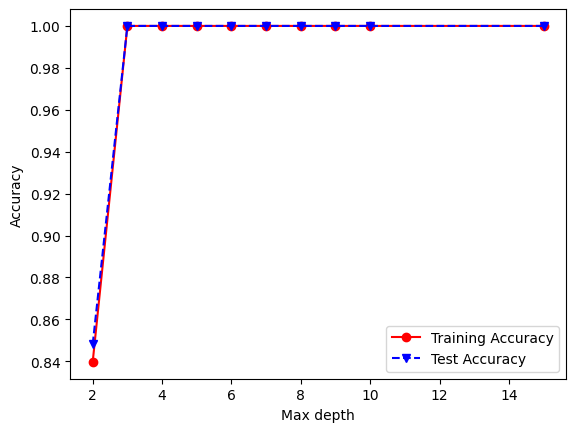

In [23]:
plt.plot(maxdepths,trainAcc_DT,'ro-',maxdepths,testAcc_DT,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

## Training Decision Tree

In [24]:
model_decisionTree = DecisionTreeClassifier(max_depth=3)
model_decisionTree = model_decisionTree.fit(X_train_DT, Y_train_DT)

Y_predTrain = temp_model_DT.predict(X_train_DT)
Y_predTest = temp_model_DT.predict(X_test_DT)

trainAcc_DT = accuracy_score(Y_train_DT, Y_predTrain)
testAcc_DT = accuracy_score(Y_test_DT, Y_predTest)
print("Training Accuracy: ", trainAcc_DT)
print("Testing Accuracy: ", testAcc_DT)

Training Accuracy:  1.0
Testing Accuracy:  1.0


## Random Forest Algorithm
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It can handle both numerical and categorical data and is capable of capturing complex relationships in the data. It does not require feature standardization as they are not sensitive to the scale of the features. Random Forest algorithms work by creating decision trees based on random subsets of features, and each decision tree independently makes decisions based on these features.

## Preparing data for Random Forest Regressor


In [40]:
# Define X and Y features
X_features_RF = data[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                        'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                        'SERVING SHOT',
                        'OBSERVATION NUMBER']]

Y_features_RF = data[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Y) metres', 
                   'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

# splitting data into X, Y train test, 80/20
X_train_RF, X_test_RF, Y_train_RF, Y_test_RF = train_test_split(X_features_RF, Y_features_RF, test_size=0.2, random_state=42)

## Optimizing Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor  # for regression tasks
# Define a list of depths to test
depths = [5, 10, 15, 20, 25, 30]
mse_scores = []

# Iterate over different depths and calculate MSE
for depth in depths:
    temp_model_RF = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=42)
    temp_model_RF.fit(X_train_RF, Y_train_RF)
    y_pred = temp_model_RF.predict(X_test_RF)
    mse = mean_squared_error(Y_test_RF, y_pred)
    mse_scores.append(mse)

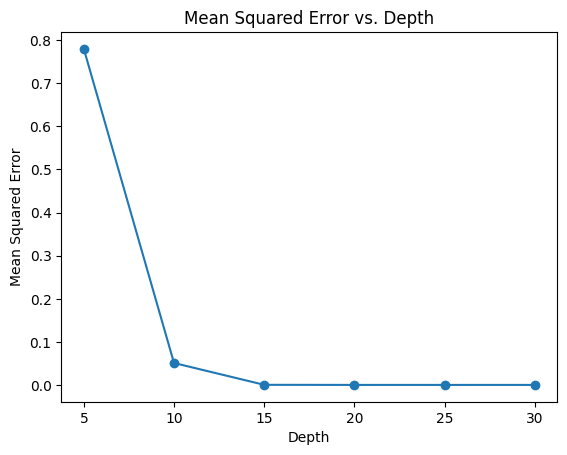

In [42]:
# Plotting the MSE scores
plt.plot(depths, mse_scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Depth')
plt.show()

## Training with Random Forest
This model will allow us predict an X, Y, Z coordinate in relation to the independent features supplied

In [43]:
model_randomForest = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)  # for regression

model_randomForest.fit(X_train_RF, Y_train_RF)
y_pred = model_randomForest.predict(X_test_RF)

mse = mean_squared_error(Y_test_RF, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0006108060528925537


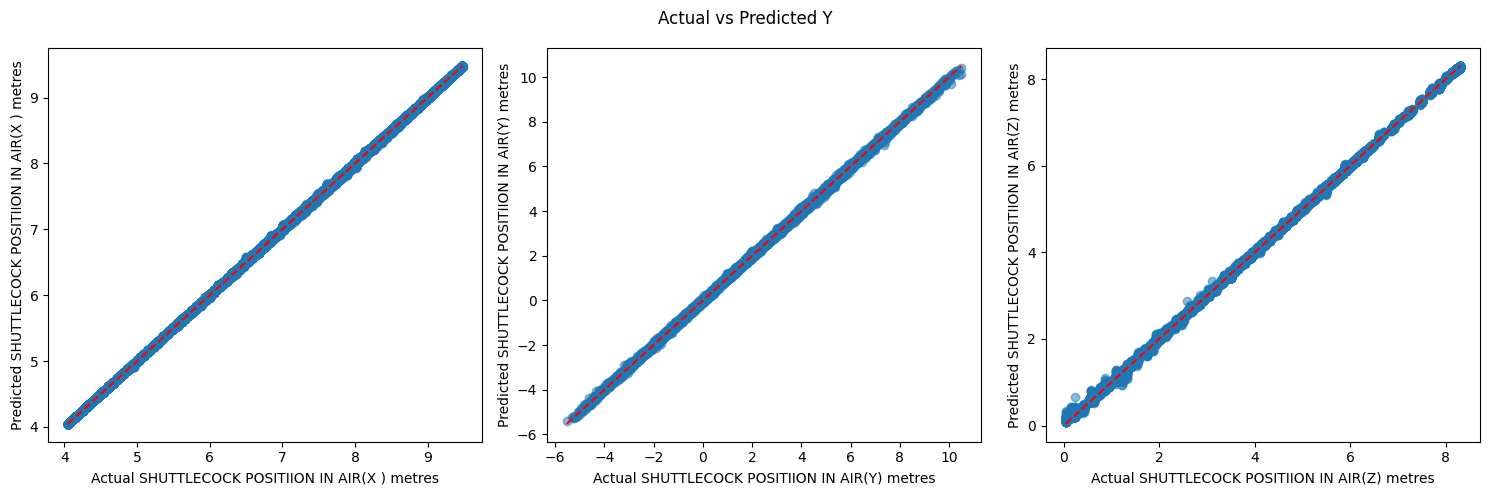

In [44]:
# Plotting the scatterplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting for each target variable
for i, target in enumerate(Y_features_RF.columns):
    ax[i].scatter(Y_test_RF[target], y_pred[:, i], alpha=0.5)
    ax[i].plot([Y_test_RF[target].min(), Y_test_RF[target].max()], [Y_test_RF[target].min(), Y_test_RF[target].max()], 'r--')
    ax[i].set_xlabel('Actual ' + target)
    ax[i].set_ylabel('Predicted ' + target)

plt.suptitle('Actual vs Predicted Y')
plt.tight_layout()
plt.show()

In [37]:
import plotly.graph_objects as go
from plotly.offline import plot

# Create traces for actual and predicted values
actual_trace = go.Scatter3d(
    x=Y_test_RF['SHUTTLECOCK POSITIION IN AIR(X ) metres'],
    y=Y_test_RF['SHUTTLECOCK POSITIION IN AIR(Y) metres'],
    z=Y_test_RF['SHUTTLECOCK POSITIION IN AIR(Z) metres'],
    name='Actual',
    mode='markers',
    marker=dict(
        color='blue',
        size=3,
        symbol='circle'
    )
)

predicted_trace = go.Scatter3d(
    x=y_pred[:, 0],
    y=y_pred[:, 1],
    z=y_pred[:, 2],
    name='Predicted',
    mode='markers',
    marker=dict(
        color='red',
        size=3,
        symbol='circle'
    )
)

# Create layout
layout = go.Layout(
    title='Actual vs Predicted Shuttlecock Positions',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Create figure
fig = go.Figure(data=[actual_trace, predicted_trace], layout=layout)

# Save the plot as an HTML file
plot(fig, filename='shuttlecock_positions.html')

'shuttlecock_positions.html'

## Testing the Both Models
Given that I am supplied some records such as the
- HUMAN PLAYER POSITION (X) metres
- HUMAN PLAYER POSITION (Y) metres
- INITITAL VELOCITY OF SHUTTELCOCK(m/s)
- INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)
- SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)
- SERVING SHOT (May have to figure out a way to classify this)

Predict its trajectory and possibly countermeasures

In [98]:
# Testing out with some sample data
# Given a data to perform prediction on, Basically the first record X values + serving shot = 1
# test_record = data.head(1)
test_record =  data.tail(1)
test_record = test_record[['HUMAN PLAYER POSITION (X) metres', 
                            'HUMAN PLAYER POSITION (Y) metres', 
                            'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                            'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                            'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                            'SERVING SHOT']]

test_record
# predict the number of observation steps, given a record
predicted_observation_steps = int(model_decisionTree.predict(test_record))

# container to stores generated X_features_RF of predicted observation
pred_obs_list = []
# populate x_feature of predicted observation
for obs_num in range(1, predicted_observation_steps+1):
    temp = test_record.values.tolist()
    temp_obs_row = temp[:5][0]
    temp_obs_row.append(obs_num)
    pred_obs_list.append(temp_obs_row)

# Turn it into dataframe
column_names = [
    'HUMAN PLAYER POSITION (X) metres',
    'HUMAN PLAYER POSITION (Y) metres',
    'INITITAL VELOCITY OF SHUTTELCOCK(m/s)',
    'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
    'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
    'SERVING SHOT',
    'OBSERVATION NUMBER'
]

pred_obs_df = pd.DataFrame(pred_obs_list, columns = column_names)

test_pred = model_randomForest.predict(pred_obs_df)

columns_n = ['X','Y','Z']
test_pred_df = pd.DataFrame(test_pred, columns=columns_n)
test_pred_df.to_csv('trajectory_estimation.csv')

In [99]:
import plotly.graph_objects as go
import plotly.offline as offline

# Extract X, Y, Z coordinates from test_pred
x = test_pred_df['X']
y = test_pred_df['Y']
z = test_pred_df['Z']

# Create a scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color='blue'), name='Plot 1')])

# Set labels and title
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
), title='3D Scatter Plot')

# Set initial view
fig.update_layout(scene_camera=dict(eye=dict(x=1.2, y=1.2, z=1.2)))  # Adjust the camera position as needed

fig.update_layout(scene=dict(
    xaxis=dict(range=[0, 15]),  # Set X-axis range
    yaxis=dict(range=[0, 15]),  # Set Y-axis range
    zaxis=dict(range=[0, 15])   # Set Z-axis range
), title='3D Scatter Plot')

# Save the plot as an HTML file
offline.plot(fig, filename='interactive_plot.html')

'interactive_plot.html'